In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

In [2]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD

    # y = np.array(y.reshape(np.size(y), 1))
    # print(X[1].shape)
    # print(X[y == 1].shape)
    # print(X[y[:, 0] == 2].shape)
    # print(y.shape)
    means = np.transpose([np.mean(X[y[:, 0] == i, :], 0) for i in np.unique(y)])
    covmat = np.cov(np.transpose(X)) * np.eye(X.shape[1])
    # print(means.shape)
    return means,covmat

In [3]:
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    means = np.transpose([np.mean(X[y[:, 0] == i, :], 0) for i in np.unique(y)])
    covmats = np.array([np.cov(np.transpose(X[y[:, 0] == i, :])) for i in np.unique(y)])
    # print(covmats.shape)
    return means,covmats

In [4]:
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD

    ypred = np.zeros((ytest.shape[0], 1))
    # print(ytest.dtype)
    # print(ytest.shape)
    meanst = np.transpose(means)
    for i in range(ytest.shape[0]):
        Dis = (meanst-Xtest[i]).dot(inv(covmat)).dot(np.transpose(meanst-Xtest[i]))
        # print(Dis.shape)
        t = 0
        for k in range(Dis.shape[0]):
            if Dis[k, k] < Dis[t, t]:
                t = k
        ypred[i, 0] = t + 1
    # print(ypred.dtype)
    # print(ypred.shape)
    acc = float(np.sum(ypred == ytest))/ytest.shape[0]
    return acc,ypred

In [5]:
def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD

    ypred = np.zeros((ytest.shape[0], 1))
    meanst = np.transpose(means)
    for i in range(ytest.shape[0]):
        pdf = [1.0 / ((np.sum(covmats[k] ** 2))**0.5) * np.exp((-1 / 2) * (meanst[k, :]-Xtest[i]).dot(inv(covmats[k])).dot(np.transpose(meanst[k, :]-Xtest[i]))) for k in range(covmats.shape[0])]
        t = np.argmax(pdf)
        ypred[i, 0] = t + 1
    # print(ypred.shape)
    acc = float(np.sum(ypred == ytest))/ytest.shape[0]
    return acc,ypred

In [6]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
	
    # IMPLEMENT THIS METHOD
    w = (np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X))).dot(y)                                                   
    return w

In [7]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1                                                                

    # IMPLEMENT THIS METHOD
    w = (np.linalg.inv(lambd * np.identity(X.shape[1])+np.transpose(X).dot(X)).dot(np.transpose(X))).dot(y)                                                   
    return w

In [8]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    
    # IMPLEMENT THIS METHOD
    mse = (np.transpose(ytest - Xtest.dot(w)).dot(ytest - Xtest.dot(w)))/Xtest.shape[0]
    return mse

In [9]:
def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                                                  

    # IMPLEMENT THIS METHOD
    
    # print(len(w))
    # print(X.shape)
    # print(y.shape)
    # print(w.shape)
    w = np.array(w.reshape(np.size(w), 1))
    # print(w.shape)
    error = 0.5 * np.transpose(y - X.dot(w)).dot(y - X.dot(w)) + 0.5 * lambd * np.transpose(w).dot(w)
    # print((np.transpose(X).dot(y - X.dot(w))).shape)
    # print((lambd*w).shape)
    error_grad = np.transpose(X).dot(X.dot(w) - y) + lambd * w
    error_grad = error_grad.flatten()
    # print(error_grad.shape)                                            
    return error, error_grad

In [10]:
def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xp - (N x (p+1)) 
	
    # IMPLEMENT THIS METHOD
    x = np.array(x.reshape(np.size(x), 1))
    Xp = np.array([[x[i, 0]**j for j in range(p+1)] for i in range(np.size(x))])
    # Xp = np.array([x[:, i] ** i for i in range(p+1)])
    # print(Xp.shape)
    return Xp

LDA Accuracy = 0.97
QDA Accuracy = 0.97
---------------------------------------------------------------------------------------------------


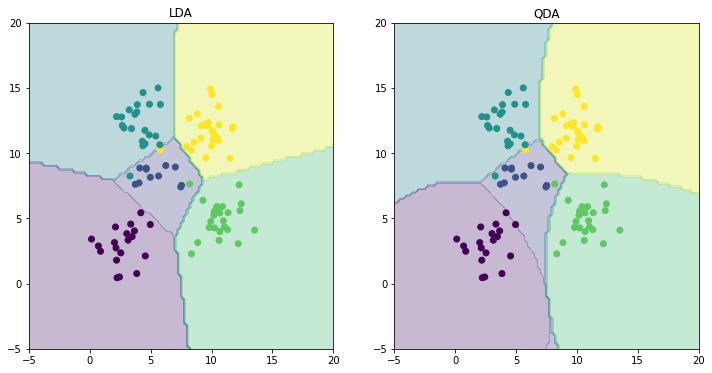

In [11]:
# Main script

# Problem 1
# load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))
print('---------------------------------------------------------------------------------------------------')

# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('QDA')

plt.show()

In [12]:
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

mle_train = testOLERegression(w,X,y)    #+++++++++++

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

mle_train_i = testOLERegression(w_i,X_i,y)   #++++++++++++

print('MSE for testing data without intercept: ' + str(mle[0][0]))
print('MSE for testing data with intercept: ' + str(mle_i[0][0]))

print('---------------------------------------------------------------------------------------------------')
print('MSE for training data without intercept: ' + str(mle_train[0][0]))    
print('MSE for training data with intercept: ' + str(mle_train_i[0][0]))      
print('---------------------------------------------------------------------------------------------------')

MSE for testing data without intercept: 106775.36156341781
MSE for testing data with intercept: 3707.840181379404
---------------------------------------------------------------------------------------------------
MSE for training data without intercept: 19099.446844570673
MSE for training data with intercept: 2187.1602949303906
---------------------------------------------------------------------------------------------------


Ridge Regression for training data. Optimal lambda: 0.0; Optimal MSE: 2187.1602949303906
Ridge Regression for testing data. Optimal lambda: 0.06; Optimal MSE: 2851.3302134438477
---------------------------------------------------------------------------------------------------


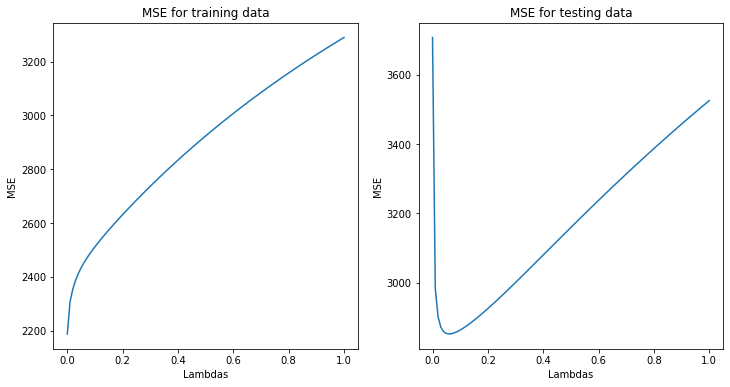

In [13]:
# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    # print(i, lambd, mses3_train[i, 0], mses3[i, 0])     #++++++++++++
    i = i + 1
print('Ridge Regression for training data. Optimal lambda: ' + str(0.01*np.argmin(mses3_train)) + '; Optimal MSE: ' + str(np.min(mses3_train)))
print('Ridge Regression for testing data. Optimal lambda: ' + str(0.01*np.argmin(mses3)) + '; Optimal MSE: ' + str(np.min(mses3)))
print('---------------------------------------------------------------------------------------------------')

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for training data')
plt.xlabel('Lambdas')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for testing data')
plt.xlabel('Lambdas')
plt.ylabel('MSE')

plt.show()

Gradient Descent for training data. Optimal lambda: 0.02; Optimal MSE: 2414.55371717141
Gradient Descent for testing data. Optimal lambda: 0.06; Optimal MSE: 2822.874412131331
---------------------------------------------------------------------------------------------------


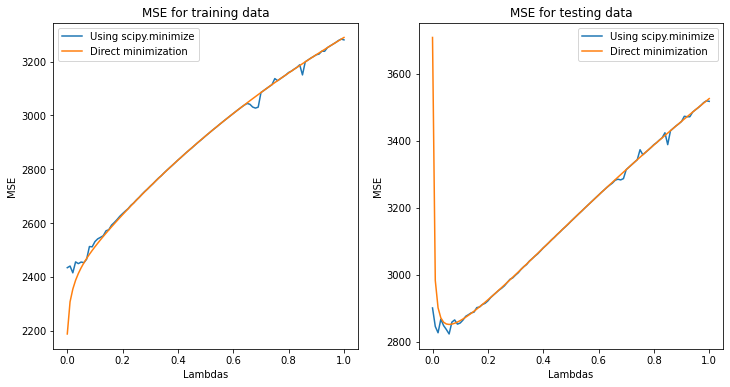

In [14]:
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    # print(i, lambd, mses4_train[i, 0], mses4[i, 0])     #++++++++++++
    i = i + 1
print('Gradient Descent for training data. Optimal lambda: ' + str(0.01*np.argmin(mses4_train)) + '; Optimal MSE: ' + str(np.min(mses4_train)))
print('Gradient Descent for testing data. Optimal lambda: ' + str(0.01*np.argmin(mses4)) + '; Optimal MSE: ' + str(np.min(mses4)))
print('---------------------------------------------------------------------------------------------------')

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for training data')
plt.xlabel('Lambdas')
plt.ylabel('MSE')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for testing data')
plt.xlabel('Lambdas')
plt.ylabel('MSE')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()

Non-linear Regression(No Regularization) for training data. Optimal p: 6; Optimal MSE: 3866.88344944605
Non-linear Regression(No Regularization) for testing data. Optimal p: 1; Optimal MSE: 3845.034730173414
---------------------------------------------------------------------------------------------------
Non-linear Regression(Regularization) for training data. Optimal p: 6; Optimal MSE: 3950.6823351427815
Non-linear Regression(Regularization) for testing data. Optimal p: 4; Optimal MSE: 3895.582668283526
---------------------------------------------------------------------------------------------------


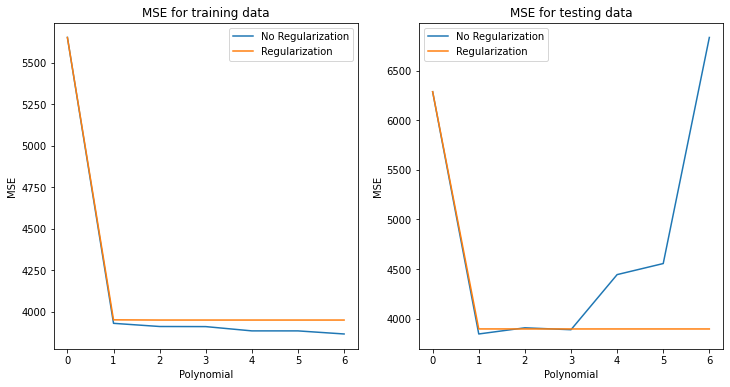

In [15]:
# Problem 5
pmax = 7
lambda_opt = lambdas[np.argmin(mses3)] # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)
print('Non-linear Regression(No Regularization) for training data. Optimal p: ' + str(np.argmin(mses5_train[:, 0])) + '; Optimal MSE: ' + str(np.min(mses5_train[:, 0])))
print('Non-linear Regression(No Regularization) for testing data. Optimal p: ' + str(np.argmin(mses5[:, 0])) + '; Optimal MSE: ' + str(np.min(mses5[:, 0])))
print('---------------------------------------------------------------------------------------------------')
print('Non-linear Regression(Regularization) for training data. Optimal p: ' + str(np.argmin(mses5_train[:, 1])) + '; Optimal MSE: ' + str(np.min(mses5_train[:, 1])))
print('Non-linear Regression(Regularization) for testing data. Optimal p: ' + str(np.argmin(mses5[:, 1])) + '; Optimal MSE: ' + str(np.min(mses5[:, 1])))
print('---------------------------------------------------------------------------------------------------')

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for training data')
plt.xlabel('Polynomial')
plt.ylabel('MSE')
plt.legend(('No Regularization','Regularization'))

plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for testing data')
plt.xlabel('Polynomial')
plt.ylabel('MSE')
plt.legend(('No Regularization','Regularization'))
plt.show()